# Multi-Class Classification Using the Convolution Neural Network

## 1.Load the data

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-03-13 13:33:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 173.194.194.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   149MB/s    in 3.4s    

2023-03-13 13:33:50 (146 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
!unzip 10_food_classes_all_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/554363.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._554363.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2100953.jpg  
  inf

In [3]:
import os

for dirpath,dirname,filename in os.walk('/content/10_food_classes_all_data'):
  print(f'directories :{len(dirname)} images:{len(filename)} path:{dirpath}')

directories :2 images:0 path:/content/10_food_classes_all_data
directories :10 images:0 path:/content/10_food_classes_all_data/train
directories :0 images:750 path:/content/10_food_classes_all_data/train/ice_cream
directories :0 images:750 path:/content/10_food_classes_all_data/train/chicken_wings
directories :0 images:750 path:/content/10_food_classes_all_data/train/sushi
directories :0 images:750 path:/content/10_food_classes_all_data/train/hamburger
directories :0 images:750 path:/content/10_food_classes_all_data/train/chicken_curry
directories :0 images:750 path:/content/10_food_classes_all_data/train/ramen
directories :0 images:750 path:/content/10_food_classes_all_data/train/pizza
directories :0 images:750 path:/content/10_food_classes_all_data/train/grilled_salmon
directories :0 images:750 path:/content/10_food_classes_all_data/train/steak
directories :0 images:750 path:/content/10_food_classes_all_data/train/fried_rice
directories :10 images:0 path:/content/10_food_classes_all_

In [4]:
os.listdir('/content/10_food_classes_all_data/train')

['ice_cream',
 'chicken_wings',
 'sushi',
 'hamburger',
 'chicken_curry',
 'ramen',
 'pizza',
 'grilled_salmon',
 'steak',
 'fried_rice']

In [5]:
class_names = ['ice_cream',
 'chicken_wings',
 'sushi',
 'hamburger',
 'chicken_curry',
 'ramen',
 'pizza',
 'grilled_salmon',
 'steak',
 'fried_rice']
 

In [6]:
class_names = sorted(class_names)

In [7]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

getting the random image from the data

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np

def get_random_img(target_dir,target_class):
  target_folder = target_dir + '/' +target_class

  rn = random.sample(os.listdir(target_folder),1)
  print(rn)

  img = mpimg.imread(target_folder+'/'+rn[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(img.shape)

  return img

['3001740.jpg']
(512, 512, 3)


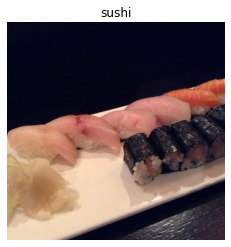

In [9]:
img = get_random_img('/content/10_food_classes_all_data/train',random.choice(class_names))

## 2.Preprocess the image

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


#creating the instance for the imagedatagenerator for the training data
train_datagen = ImageDataGenerator(rescale=1/255.)

#creating the instance for the imagedatagenerator for the testing data
test_datagen = ImageDataGenerator(rescale=1/255.)

#creating the batches for the training data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               seed=42)

#creating the batches foe the testing data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
images , labels = train_data.next()

In [12]:
class_names[np.argmax(labels[1])]

'steak'

(-0.5, 223.5, 223.5, -0.5)

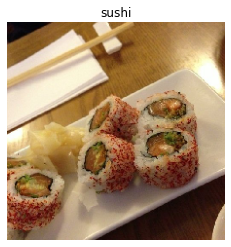

In [13]:
rn = random.randint(0,31)
plt.imshow(images[rn])
plt.title(class_names[np.argmax(labels[rn])])
plt.axis(False)

## 3.Create a model

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10,3),
    Activation(activation='relu'),
    Conv2D(10,3),
    Activation(activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])


history_1 = model_1.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 73s 262ms/step - loss: 2.0625 - accuracy: 0.2551 - val_loss: 1.9219 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 63s 269ms/step - loss: 1.7840 - accuracy: 0.3888 - val_loss: 1.8279 - val_accuracy: 0.3596
Epoch 3/5
235/235 [==============================] - 63s 270ms/step - loss: 1.4387 - accuracy: 0.5197 - val_loss: 1.8959 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 58s 245ms/step - loss: 0.9092 - accuracy: 0.7059 - val_loss: 2.4258 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 64s 272ms/step - loss: 0.4186 - accuracy: 0.8689 - val_loss: 3.2620 - val_accuracy: 0.2976


In [15]:
model_1.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 3.2620 - accuracy: 0.2976


[3.2619521617889404, 0.29760000109672546]

## 4.Evaluate the model

In [16]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

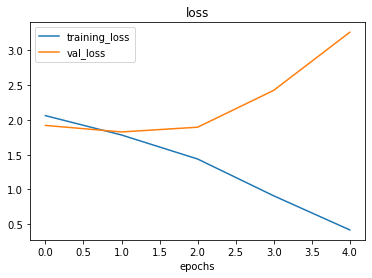

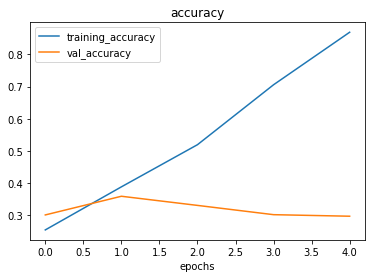

In [17]:
plot_loss_curves(history_1)

from this you can understand our overfitting on the training data and not generalized well

In [28]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10,3),
    Activation(activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])


history_2 = model_2.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 222ms/step - loss: 2.0684 - accuracy: 0.2668 - val_loss: 1.9063 - val_accuracy: 0.3336
Epoch 2/5
235/235 [==============================] - 50s 215ms/step - loss: 1.6900 - accuracy: 0.4291 - val_loss: 1.8211 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 51s 219ms/step - loss: 1.2795 - accuracy: 0.5824 - val_loss: 1.9142 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 0.8303 - accuracy: 0.7457 - val_loss: 2.2404 - val_accuracy: 0.3364
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.4766 - accuracy: 0.8715 - val_loss: 2.5002 - val_accuracy: 0.3320


To reduce overfitting we are gonna use the **data augmentation**  

In [22]:
train_datagen_augumented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             zoom_range=0.2)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                   target_size=(224,224))

Found 7500 images belonging to 10 classes.


In [21]:
model_3 = tf.keras.models.clone_model(model_1)

In [26]:
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])


history_3 = model_3.fit(train_data_augumented,epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 153s 639ms/step - loss: 1.8024 - accuracy: 0.3852 - val_loss: 1.6402 - val_accuracy: 0.4504
Epoch 2/20
235/235 [==============================] - 141s 602ms/step - loss: 1.7866 - accuracy: 0.3877 - val_loss: 1.6733 - val_accuracy: 0.4524
Epoch 3/20
235/235 [==============================] - 149s 634ms/step - loss: 1.7612 - accuracy: 0.3940 - val_loss: 1.6867 - val_accuracy: 0.4168
Epoch 4/20
235/235 [==============================] - 128s 546ms/step - loss: 1.7648 - accuracy: 0.3991 - val_loss: 1.7162 - val_accuracy: 0.4320
Epoch 5/20
235/235 [==============================] - 123s 523ms/step - loss: 1.7410 - accuracy: 0.4023 - val_loss: 1.6261 - val_accuracy: 0.4636
Epoch 6/20
235/235 [==============================] - 126s 536ms/step - loss: 1.7259 - accuracy: 0.4145 - val_loss: 1.6247 - val_accuracy: 0.4656
Epoch 7/20
235/235 [==============================] - 116s 492ms/step - loss: 1.7138 - accuracy: 0.4196 - val_loss: 1.5543 -

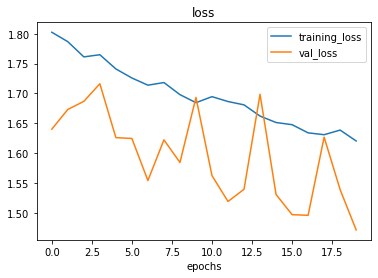

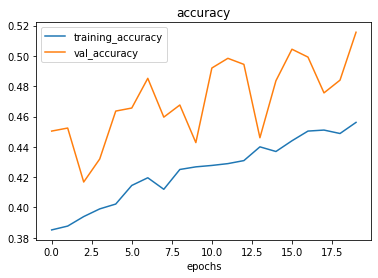

In [27]:
plot_loss_curves(history_3)

In [29]:
model_3.save('food_model_3.h5')

## 5.Predicting custom images using our images

In [30]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
class

In [45]:
img = load_and_prep_image('/content/1200px-Shoyu_ramen,_at_Kasukabe_Station_(2014.05.05)_1.jpg')
pred = model_3.predict(tf.expand_dims(img, axis=0))
class_names[int(np.argmax(pred,axis=1))]

1/1 [==============================] - 0s 46ms/step


'ramen'

In [47]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(np.argmax(pred,axis=1))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
     

lets download some images

In [ ]:
!wget https://www.cookingclassy.com/wp-content/uploads/2022/07/grilled-steak-15.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg/800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg/1200px-Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg
!wget https://cdn.britannica.com/52/128652-050-14AD19CA/Maki-zushi.jpg
!wget https://cdn.britannica.com/50/80550-050-5D392AC7/Scoops-kinds-ice-cream.jpg

1/1 [==============================] - 0s 26ms/step


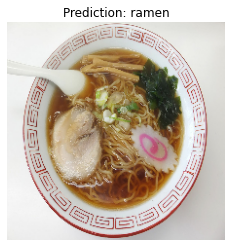

In [48]:
pred_and_plot(model_3,'1200px-Shoyu_ramen,_at_Kasukabe_Station_(2014.05.05)_1.jpg')

1/1 [==============================] - 0s 34ms/step


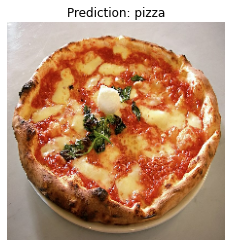

In [49]:
pred_and_plot(model_3,'/content/800px-Eq_it-na_pizza-margherita_sep2005_sml.jpg')

1/1 [==============================] - 0s 20ms/step


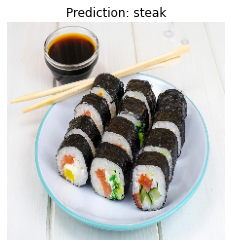

In [50]:
pred_and_plot(model_3,'/content/Maki-zushi.jpg')

1/1 [==============================] - 0s 19ms/step


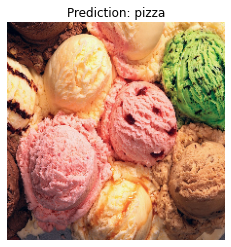

In [51]:
pred_and_plot(model_3,'/content/Scoops-kinds-ice-cream.jpg')

1/1 [==============================] - 0s 21ms/step


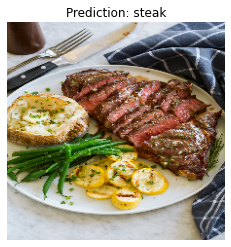

In [52]:
pred_and_plot(model_3,'/content/grilled-steak-15.jpg')

In [ ]:
!wget https://hips.hearstapps.com/hmg-prod/images/easiest-ever-fruit-and-coconut-ice-cream-1643120950.jpg

1/1 [==============================] - 0s 21ms/step


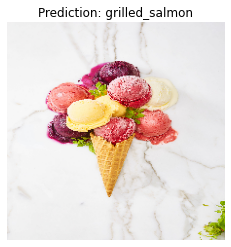

In [56]:
pred_and_plot(model_3,'/content/easiest-ever-fruit-and-coconut-ice-cream-1643120950.jpg')

looks like our did'nt recognize the ice cream and sushi